In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.utils import plot_model

# 모델

In [2]:
# GPU 메모리제한
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*7)])
    except RuntimeError as e:
        # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
        print(e)

In [ ]:
# 모델 작성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv3D, MaxPool3D,Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2

model_name = '모델_3_1'

weight_decay = 0.005
num_class = 26
input_shape=(112,112)
channel_num = 3

model = Sequential()
model.add(Conv3D(64,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=input_shape+(frame_num, channel_num)))
model.add(MaxPool3D((2,2,1),strides=(2,2,1),padding='same'))

model.add(Conv3D(128,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Flatten())
model.add(Dense(units=int(4096), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=int(4096), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
# 모델 작성_축약
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv3D, MaxPool3D,Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam
from tensorflow.keras.regularizers import l2

model_name = '모델5_2'

weight_decay = 0.005
frame_num = 16
num_class = 26
input_shape=(112,112)
channel_num = 3

model = Sequential()
model.add(Conv3D(64,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=input_shape+(frame_num, channel_num)))
model.add(MaxPool3D((2,2,1),strides=(2,2,1),padding='same'))

model.add(Conv3D(128,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Flatten())
model.add(Dense(units=int(2048), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=int(2048), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_10 (Conv3D)           (None, 112, 112, 16, 64)  5248      
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 56, 56, 16, 64)    0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 56, 56, 16, 128)   221312    
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 28, 28, 8, 128)    0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 28, 28, 8, 128)    442496    
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 14, 14, 4, 128)    0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 14, 14, 4, 256)   

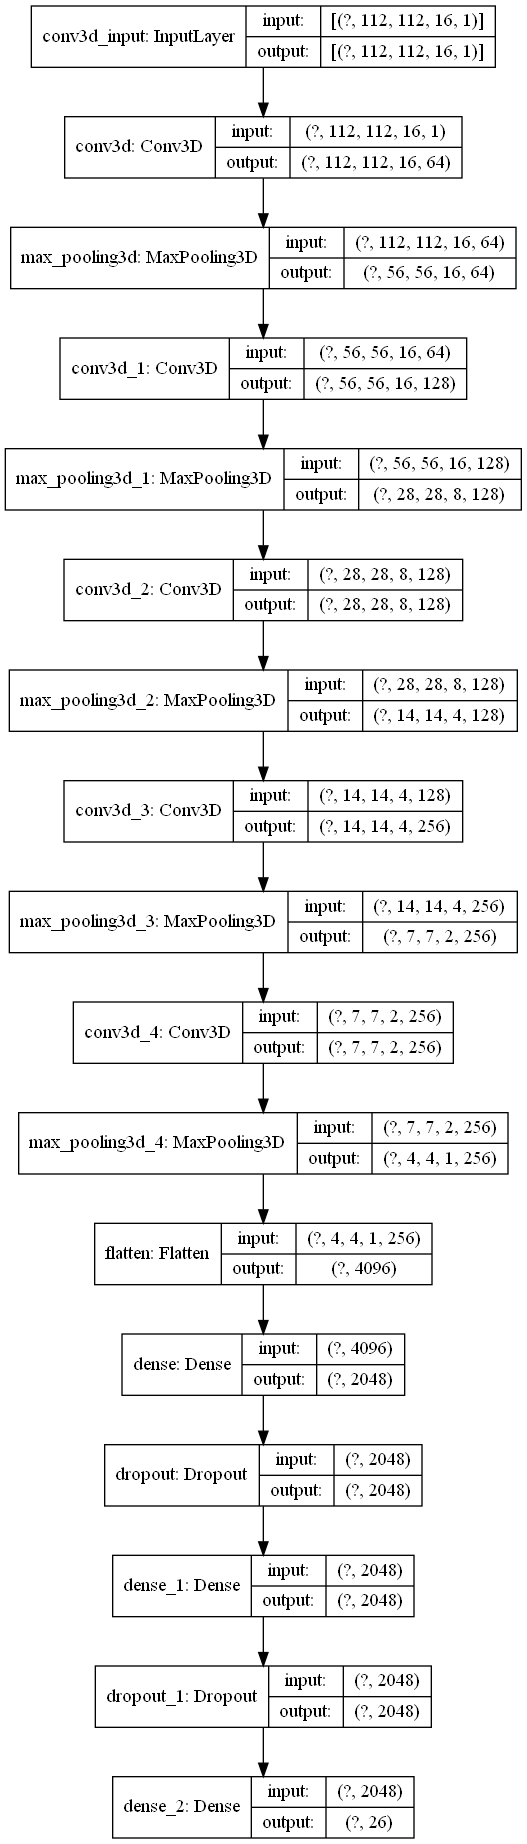

In [4]:
plot_model(model, show_shapes=True, rankdir='TB', dpi=96, 
           to_file=f'../data/models/{model_name}.png')

In [6]:
# 학습
base_dir = '../data/pre'
folder_list = os.listdir(base_dir)

batch_size = 1
shuffle_list = list(range(0,num_class))*batch_size

history_dict = {'acc':list(), 'val_acc':list(), 'loss':list(), 'val_loss':list()}

# early stopping용 변수
loss_f = 100000
count = 0
patience = 10
threshold = 0.0001

for batch in range(int(len(folder_list)/batch_size)):
    batch_x_data = list()
    batch_t_data = list()
    for folder in folder_list[batch*batch_size:(batch+1)*batch_size]:
        for n in range(num_class):
            file_dir = os.path.join(base_dir, (folder+'/'+str(n)))
            file_list = os.listdir(os.path.join(base_dir, (folder+'/'+str(n))))
            temp_data = list()
            a = np.random.normal()/10
            for file in range(16):
                img = cv2.imread(os.path.join(file_dir, str(file)+'.jpg'))
                # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = np.array(img)
                # img = img.reshape(img.shape+(1,))
                # 정규화
                img = img/255
                temp_data.append(img)
            temp_data = np.array(temp_data)
            batch_x_data.append(temp_data)
            batch_t_data.append(n)

    # 리스트인 batch_x_data를 ndarray로
    batch_x_data = np.array(batch_x_data)
    batch_t_data = np.array(batch_t_data)

    # 축변경
    batch_x_data = np.swapaxes(batch_x_data,1,2)
    batch_x_data = np.swapaxes(batch_x_data,2,3)

    # data shuffle
    random.shuffle(shuffle_list)

    batch_x_data = batch_x_data[shuffle_list]
    batch_t_data = batch_t_data[shuffle_list]

    # one_hot_encording
    batch_t_data = np.array(batch_t_data)
    batch_t_data = pd.DataFrame(batch_t_data, columns=['t'])
    batch_t_data = pd.get_dummies(batch_t_data['t'])
    
    # learning
    history = model.fit(x=batch_x_data, y=batch_t_data.values, epochs=2, verbose=1, validation_split=0.3)    
    history_dict['acc'].append(history.history['accuracy']) 
    history_dict['val_acc'].append(history.history['val_accuracy'])
    
    history_dict['loss'].append(history.history['loss'])
    history_dict['val_loss'].append(history.history['val_loss'])
    
    
    # early stopping구현
    loss_r = np.mean(history.history['loss'])
    if (loss_r <= 1.5) & ((loss_f - loss_r) <= threshold):
        count += 1
        if count >= patience:
            break
        else:
            loss_f = loss_r
    else:
        loss_f = loss_r

Epoch 1/2
1/1 [==============================] - 1s 660ms/step - loss: 6.4751 - accuracy: 0.1111 - val_loss: 6.4800 - val_accuracy: 0.1250
Epoch 2/2
1/1 [==============================] - 0s 500ms/step - loss: 6.4780 - accuracy: 0.0000e+00 - val_loss: 6.4817 - val_accuracy: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 1s 599ms/step - loss: 6.4471 - accuracy: 0.0000e+00 - val_loss: 6.4184 - val_accuracy: 0.1250
Epoch 2/2
1/1 [==============================] - 0s 499ms/step - loss: 6.4314 - accuracy: 0.0000e+00 - val_loss: 6.4210 - val_accuracy: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 1s 518ms/step - loss: 6.4144 - accuracy: 0.0556 - val_loss: 6.3596 - val_accuracy: 0.1250
Epoch 2/2
1/1 [==============================] - 0s 491ms/step - loss: 6.3678 - accuracy: 0.0000e+00 - val_loss: 6.3539 - val_accuracy: 0.1250
Epoch 1/2
1/1 [==============================] - 1s 520ms/step - loss: 6.3725 - accuracy: 0.1111 - val_loss: 6.3410 - val_accuracy: 0.0000e+00

1/1 [==============================] - 0s 487ms/step - loss: 5.2121 - accuracy: 0.1111 - val_loss: 5.1348 - val_accuracy: 0.2500
Epoch 1/2
1/1 [==============================] - 1s 544ms/step - loss: 5.2865 - accuracy: 0.1111 - val_loss: 5.1848 - val_accuracy: 0.1250
Epoch 2/2
1/1 [==============================] - 0s 496ms/step - loss: 5.1362 - accuracy: 0.1667 - val_loss: 5.1702 - val_accuracy: 0.1250
Epoch 1/2
1/1 [==============================] - 1s 513ms/step - loss: 5.3548 - accuracy: 0.0000e+00 - val_loss: 5.4313 - val_accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 490ms/step - loss: 5.3353 - accuracy: 0.0556 - val_loss: 5.4383 - val_accuracy: 0.0000e+00
Epoch 1/2
1/1 [==============================] - 1s 537ms/step - loss: 5.2926 - accuracy: 0.0556 - val_loss: 5.4258 - val_accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 494ms/step - loss: 5.4045 - accuracy: 0.0000e+00 - val_loss: 5.4392 - val_accuracy: 0.0000e+00
Epoch 1/2
1/1

Epoch 2/2
1/1 [==============================] - 1s 504ms/step - loss: 4.5030 - accuracy: 0.1111 - val_loss: 4.2326 - val_accuracy: 0.2500
Epoch 1/2
1/1 [==============================] - 1s 526ms/step - loss: 4.4059 - accuracy: 0.1667 - val_loss: 4.2707 - val_accuracy: 0.3750
Epoch 2/2
1/1 [==============================] - 1s 515ms/step - loss: 4.3347 - accuracy: 0.1111 - val_loss: 4.2528 - val_accuracy: 0.3750
Epoch 1/2
1/1 [==============================] - 1s 546ms/step - loss: 4.4716 - accuracy: 0.1667 - val_loss: 4.2054 - val_accuracy: 0.2500
Epoch 2/2
1/1 [==============================] - 0s 498ms/step - loss: 4.5028 - accuracy: 0.0556 - val_loss: 4.1480 - val_accuracy: 0.2500
Epoch 1/2
1/1 [==============================] - 1s 532ms/step - loss: 4.5105 - accuracy: 0.1111 - val_loss: 4.2079 - val_accuracy: 0.1250
Epoch 2/2
1/1 [==============================] - 1s 513ms/step - loss: 4.3063 - accuracy: 0.1111 - val_loss: 4.2646 - val_accuracy: 0.1250
Epoch 1/2
1/1 [============

Epoch 1/2
1/1 [==============================] - 1s 588ms/step - loss: 2.9151 - accuracy: 0.5556 - val_loss: 2.3392 - val_accuracy: 0.6250
Epoch 2/2
1/1 [==============================] - 1s 544ms/step - loss: 3.0067 - accuracy: 0.5000 - val_loss: 2.2665 - val_accuracy: 0.6250
Epoch 1/2
1/1 [==============================] - 1s 550ms/step - loss: 3.0872 - accuracy: 0.2778 - val_loss: 2.5164 - val_accuracy: 0.5000
Epoch 2/2
1/1 [==============================] - 1s 534ms/step - loss: 2.3197 - accuracy: 0.6667 - val_loss: 2.5961 - val_accuracy: 0.5000
Epoch 1/2
1/1 [==============================] - 1s 555ms/step - loss: 2.8006 - accuracy: 0.3889 - val_loss: 2.4214 - val_accuracy: 0.5000
Epoch 2/2
1/1 [==============================] - 1s 523ms/step - loss: 2.9312 - accuracy: 0.3333 - val_loss: 2.4062 - val_accuracy: 0.5000
Epoch 1/2
1/1 [==============================] - 1s 565ms/step - loss: 3.5355 - accuracy: 0.3333 - val_loss: 3.1963 - val_accuracy: 0.3750
Epoch 2/2
1/1 [============

Epoch 2/2
1/1 [==============================] - 1s 532ms/step - loss: 1.9870 - accuracy: 0.7222 - val_loss: 2.2230 - val_accuracy: 0.6250
Epoch 1/2
1/1 [==============================] - 1s 560ms/step - loss: 2.3441 - accuracy: 0.5556 - val_loss: 1.9481 - val_accuracy: 0.7500
Epoch 2/2
1/1 [==============================] - 1s 537ms/step - loss: 1.9869 - accuracy: 0.6667 - val_loss: 1.9310 - val_accuracy: 0.7500
Epoch 1/2
1/1 [==============================] - 1s 554ms/step - loss: 2.0149 - accuracy: 0.7222 - val_loss: 1.8445 - val_accuracy: 0.6250
Epoch 2/2
1/1 [==============================] - 1s 539ms/step - loss: 1.8663 - accuracy: 0.6667 - val_loss: 1.8703 - val_accuracy: 0.6250
Epoch 1/2
1/1 [==============================] - 1s 559ms/step - loss: 1.7413 - accuracy: 0.7778 - val_loss: 1.5099 - val_accuracy: 0.8750
Epoch 2/2
1/1 [==============================] - 1s 537ms/step - loss: 2.0144 - accuracy: 0.6667 - val_loss: 1.5014 - val_accuracy: 0.8750
Epoch 1/2
1/1 [============

Epoch 1/2
1/1 [==============================] - 1s 558ms/step - loss: 1.5610 - accuracy: 0.7778 - val_loss: 0.9860 - val_accuracy: 1.0000
Epoch 2/2
1/1 [==============================] - 1s 532ms/step - loss: 1.5220 - accuracy: 0.7778 - val_loss: 0.9932 - val_accuracy: 1.0000
Epoch 1/2
1/1 [==============================] - 1s 554ms/step - loss: 1.2647 - accuracy: 0.8333 - val_loss: 1.3003 - val_accuracy: 1.0000
Epoch 2/2
1/1 [==============================] - 1s 532ms/step - loss: 1.3840 - accuracy: 0.8889 - val_loss: 1.3000 - val_accuracy: 1.0000
Epoch 1/2
1/1 [==============================] - 1s 574ms/step - loss: 1.6192 - accuracy: 0.7222 - val_loss: 1.0425 - val_accuracy: 1.0000
Epoch 2/2
1/1 [==============================] - 1s 520ms/step - loss: 1.6414 - accuracy: 0.7778 - val_loss: 1.0613 - val_accuracy: 1.0000
Epoch 1/2
1/1 [==============================] - 1s 546ms/step - loss: 1.7409 - accuracy: 0.5556 - val_loss: 1.1894 - val_accuracy: 1.0000
Epoch 2/2
1/1 [============

Epoch 2/2
1/1 [==============================] - 1s 529ms/step - loss: 1.1863 - accuracy: 0.8889 - val_loss: 0.9542 - val_accuracy: 1.0000
Epoch 1/2
1/1 [==============================] - 1s 565ms/step - loss: 1.1349 - accuracy: 0.8889 - val_loss: 1.0405 - val_accuracy: 0.8750
Epoch 2/2
1/1 [==============================] - 1s 536ms/step - loss: 1.2156 - accuracy: 0.8889 - val_loss: 1.0357 - val_accuracy: 1.0000
Epoch 1/2
1/1 [==============================] - 1s 553ms/step - loss: 1.4310 - accuracy: 0.7778 - val_loss: 1.0151 - val_accuracy: 1.0000
Epoch 2/2
1/1 [==============================] - 1s 531ms/step - loss: 1.0013 - accuracy: 1.0000 - val_loss: 1.0193 - val_accuracy: 1.0000
Epoch 1/2
1/1 [==============================] - 1s 548ms/step - loss: 1.1780 - accuracy: 0.8333 - val_loss: 0.8945 - val_accuracy: 1.0000
Epoch 2/2
1/1 [==============================] - 1s 524ms/step - loss: 1.4898 - accuracy: 0.8333 - val_loss: 0.9051 - val_accuracy: 1.0000
Epoch 1/2
1/1 [============

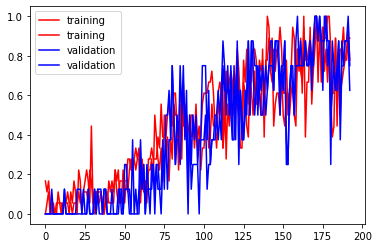

In [6]:
plt.plot(history_dict['acc'], color='r', label='training')
plt.plot(history_dict['val_acc'], color='b', label='validation')
plt.legend()
plt.savefig(f'../data/models/{model_name}_acc.jpg')
plt.show()

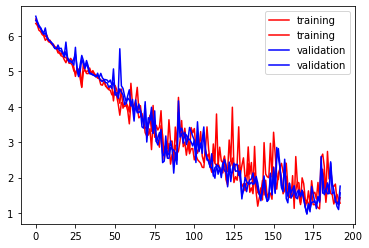

In [7]:
plt.plot(history_dict['loss'], color='r', label='training')
plt.plot(history_dict['val_loss'], color='b', label='validation')
plt.legend()
plt.savefig(f'../data/models/{model_name}_loss.jpg')
plt.show()

In [8]:
test_dir = '../data/test'
test_list = os.listdir(test_dir)
y_pred = list()
y_true = list()
acc_list = list()

for folder in test_list:
    test_x_data = list()
    test_t_data = list()
    for n in range(num_class):
        file_dir = os.path.join(test_dir, (folder+'/'+str(n)))
        file_list = os.listdir(os.path.join(test_dir, (folder+'/'+str(n))))
        temp_data = list()
        for file in range(16):
            img = cv2.imread(os.path.join(file_dir, str(file)+'.jpg'))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = np.array(img)
            # img = img.reshape(img.shape+(1,))
            # 정규화
            img = img/255
            temp_data.append(img)
        temp_data = np.array(temp_data)
        test_x_data.append(temp_data)
        test_t_data.append(n)

    # 리스트인 batch_x_data를 ndarray로
    test_x_data = np.array(test_x_data)
    test_t_data = np.array(test_t_data)

    # 축변경
    test_x_data = np.swapaxes(test_x_data,1,2)
    test_x_data = np.swapaxes(test_x_data,2,3)

    # data shuffle
    random.shuffle(shuffle_list)

    test_x_data = test_x_data[shuffle_list]
    test_t_data = test_t_data[shuffle_list]

    # one_hot_encording
    test_t_data = np.array(test_t_data)
    test_t_data = pd.DataFrame(test_t_data, columns=['t'])
    test_t_data = pd.get_dummies(test_t_data['t'])

    result = model.predict(test_x_data)
    y_pred.append(np.argmax(result, axis=1))
    y_true.append(np.argmax(test_t_data.values, axis=1))

    result = model.evaluate(x=test_x_data, y=test_t_data.values)
    acc_list.append(np.round(result, 4))

1/1 [==============================] - 0s 1ms/step - loss: 1.7678 - accuracy: 0.7692


In [ ]:
y_pred = np.array(y_pred)
print(y_pred.ravel())
y_true = np.array(y_true)
print(y_true.ravel())

result = np.equal(y_pred.ravel(), y_true.ravel())
print(np.sum(result)/len(result))

In [ ]:
acc_list = np.array(acc_list)
print(np.round(np.mean(acc_list, axis=0), 4))

In [9]:
result = model.evaluate(x=test_x_data, y=test_t_data.values)
print(np.round(result, 4))

1/1 [==============================] - 0s 1ms/step - loss: 1.7678 - accuracy: 0.7692
[1.7678 0.7692]


In [ ]:
model.save(f'../data/models/{model_name}.h5')